# 시계열 데이터 분석

In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from matplotlib import rc
%matplotlib inline
# 한글폰트 사용
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [7]:
import warnings
warnings.filterwarnings("ignore")

### 회귀(Regression) 분석하기 - Numpy polyfit¶

In [9]:
pinkwink_web = pd.read_csv('./data/PinkWink Web Traffic.csv', 
                            encoding='utf-8', thousands=',',
                            names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


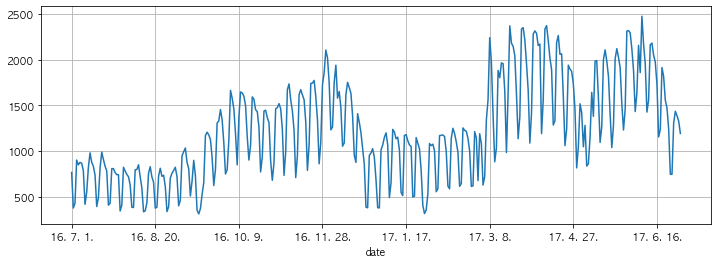

In [11]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True)
plt.show()

In [13]:
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [15]:
# Mean Squared Error: 
def mse(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [17]:
# 1차식으로 회귀식을 구하고, MSE 값을 계산
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)
mse(f1, time, traffic)

430.85973081109626

In [19]:
# 2차식으로 회귀식을 구하고, MSE 값을 계산
f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)
mse(f2, time, traffic)

430.6284101894695

In [21]:
# 3차식으로 회귀식을 구하고, MSE 값을 계산
f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)
mse(f3, time, traffic)

429.53280466762925

In [ ]:
# 15차식으로 회귀식을 구하고, MSE 값을 계산
f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)
mse(f15, time, traffic)

In [18]:
for n in range(1, 31):
    fnp = np.polyfit(time, traffic, n)
    fn = np.poly1d(fnp)
    print(f'{n}차일 경우 MSE: {mse(fn, time, traffic)}')

1차일 경우 MSE: 430.85973081109626
2차일 경우 MSE: 430.6284101894695
3차일 경우 MSE: 429.53280466762925
4차일 경우 MSE: 423.5828148341961
5차일 경우 MSE: 389.8483612021829
6차일 경우 MSE: 385.40591940643094
7차일 경우 MSE: 376.083752724362
8차일 경우 MSE: 361.83792091115043
9차일 경우 MSE: 347.7570709151062
10차일 경우 MSE: 346.33133580877166
11차일 경우 MSE: 341.38530813728266
12차일 경우 MSE: 332.4400772180358
13차일 경우 MSE: 330.72224379943356
14차일 경우 MSE: 330.5615447799965
15차일 경우 MSE: 330.4777304274343
16차일 경우 MSE: 327.5879537208797
17차일 경우 MSE: 327.0648810803929
18차일 경우 MSE: 327.25504866050477
19차일 경우 MSE: 321.8089707524151
20차일 경우 MSE: 321.8475173410411
21차일 경우 MSE: 321.6649086950498
22차일 경우 MSE: 321.3585975860227
23차일 경우 MSE: 321.03557644047413
24차일 경우 MSE: 320.658345905134
25차일 경우 MSE: 320.7840361671954
26차일 경우 MSE: 320.79833328420676
27차일 경우 MSE: 320.75213047219864
28차일 경우 MSE: 320.5672161058456
29차일 경우 MSE: 320.7210507649835
30차일 경우 MSE: 320.70879654768487


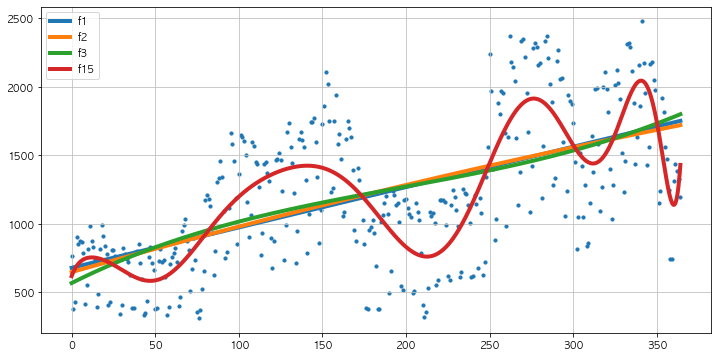

In [20]:
plt.figure(figsize=(12,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

### Prophet 모듈

In [22]:
from fbprophet import Prophet
from datetime import datetime

ModuleNotFoundError: No module named 'fbprophet'

In [24]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [25]:
# Prophet 모델의 하이퍼 파라메터 설정
model = Prophet(yearly_seasonality=True, daily_seasonality=True)

NameError: name 'Prophet' is not defined

In [ ]:
# 모델 학습
model.fit(df)

In [ ]:
future = model.make_future_dataframe(periods=60)
future.tail()

In [ ]:
# 예측 - predict
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
model.plot(forecast);

In [ ]:
model.plot_components(forecast);